In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv(
    "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
    na_values=["9999", "", " ", "Presented but no response", "NA"],
    low_memory=False
)
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

In [2]:
A = 'WELLNESS_life_satisfaction'
B = 'DEMO_relationship_status'
C = 'DEMO_age'
D = 'COVID_vaccinated'
E = 'CONNECTION_activities_greeted_neighbour_or_stranger_pm'
F = 'CONNECTION_activities_group_exercise_pm'
G = 'CONNECTION_activities_helped_pm'
H = 'CONNECTION_activities_hug_pm'
I = 'CONNECTION_activities_kissed_pm'
J = 'CONNECTION_activities_visited_family_pm'
K = 'CONNECTION_activities_visited_friends_pm'
L = 'CONNECTION_activities_new_friend_pm'
M = 'WELLNESS_self_rated_mental_health'
categories = [A,B,C,D,E,F,G,H,I,J,K,L,M]

data2 = data[categories]

cleaned_df = data2.dropna()


In [3]:
cleaned_df3 = cleaned_df.copy()
social_activities = [E,F,G,H,I,J,K,L]
for activity in social_activities:
    cleaned_df3.loc[:, activity] = cleaned_df3[activity].map({"Yes": 1, "No": 0})

cleaned_df3['average_activity'] = cleaned_df3[social_activities].mean(axis=1)

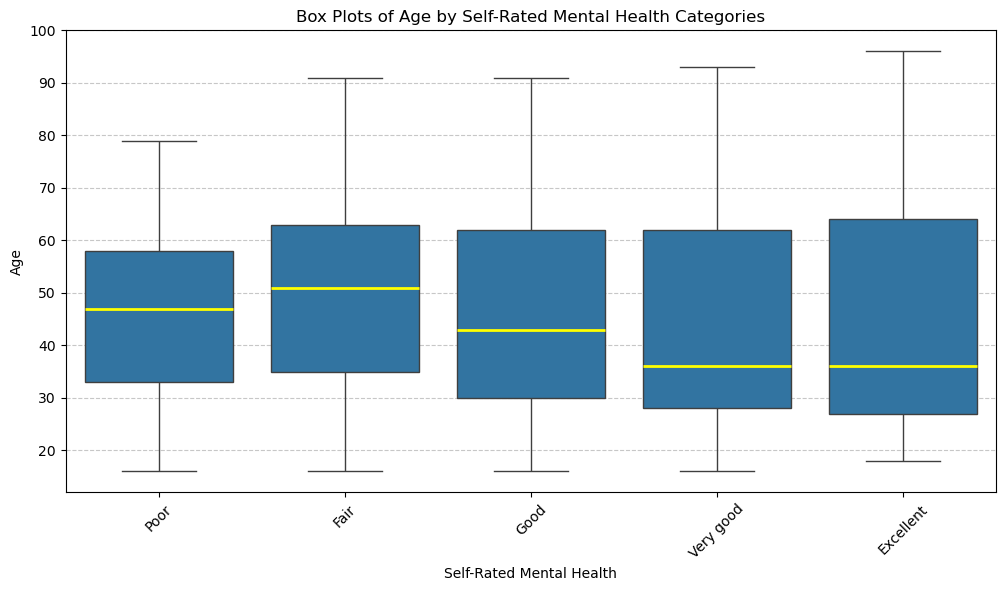

In [4]:
# Get unique categories
raw_categories = cleaned_df['WELLNESS_self_rated_mental_health'].unique()

categories = raw_categories[:5]  # Select the top 5 categories for plotting
temp = categories[1]
categories[1] = categories[3]
categories[3] = temp

# Filter the DataFrame to include only the selected categories
subset_data = cleaned_df[cleaned_df['WELLNESS_self_rated_mental_health'].isin(categories)]

# Create a single box plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='WELLNESS_self_rated_mental_health',  # Categories on the x-axis
    y='DEMO_age',  # Values for the box plot on the y-axis
    data=subset_data,  # Data to plot
    order=categories,  # Explicitly specify the order
    medianprops={"color": "yellow", "linewidth": 2}  # Highlight the median line
)

# Customize the plot
plt.title('Box Plots of Age by Self-Rated Mental Health Categories')
plt.xlabel('Self-Rated Mental Health')
plt.ylabel('Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional grid for y-axis

plt.show()

In [5]:
# Example DataFrame
# df = pd.read_csv("your_dataset.csv")

cleaned_df4 = cleaned_df.copy()

# Ensure DEMO_age is binned if it's continuous
cleaned_df4['DEMO_age_group'] = pd.cut(cleaned_df4['DEMO_age'], bins=[0, 17, 29, 44, 59, 100], 
                              labels=['0-17', '18-29', '30-44', '45-59', '60-100'])

# Create a contingency table
contingency_table = pd.crosstab(cleaned_df4['DEMO_age_group'], cleaned_df4['WELLNESS_self_rated_mental_health'])

print("Contingency Table:")
print(contingency_table)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)

# Interpretation
if p < 0.05:
    print("\nThe result is statistically significant. Age group and self-rated mental health are dependent.")
else:
    print("\nThe result is not statistically significant. Age group and self-rated mental health are independent.")


print(cleaned_df4['DEMO_age_group'])

Contingency Table:
WELLNESS_self_rated_mental_health  Excellent  Fair  Good  Poor  Very good
DEMO_age_group                                                           
0-17                                       0    11     6     9          7
18-29                                    247   198   456   126        524
30-44                                    215   345   540   168        515
45-59                                     85   361   363   196        248
60-100                                   244   489   595   150        513

Chi-Square Test Results:
Chi-Square Statistic: 278.8239275126805
P-value: 6.081705102937189e-50
Degrees of Freedom: 16

Expected Frequencies:
[[  3.9484193    7.00831947   9.78369384   3.23960067   9.01996672]
 [185.57570715 329.39101498 459.83361065 152.26123128 423.93843594]
 [213.33429133 378.66162457 528.61594313 175.03660566 487.35153532]
 [149.92028437 266.10376645 371.48389049 123.00665557 342.48540312]
 [238.22129784 422.83527454 590.2828619  195.455

0        60-100
1        60-100
2         45-59
3         45-59
4         30-44
          ...  
11422     45-59
11425     45-59
11426     45-59
11427     30-44
11430     30-44
Name: DEMO_age_group, Length: 6611, dtype: category
Categories (5, object): ['0-17' < '18-29' < '30-44' < '45-59' < '60-100']


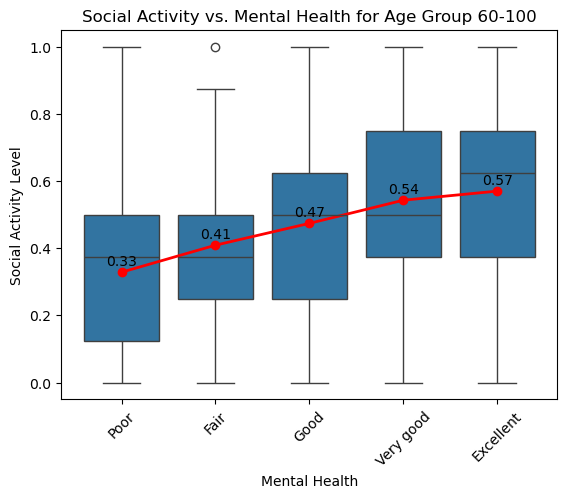

In [6]:
cleaned_df5 = cleaned_df4.copy()
print(cleaned_df5['DEMO_age_group'])

social_activities = [E,F,G,H,I,J,K,L]
for activity in social_activities:
    cleaned_df5.loc[:, activity] = cleaned_df5[activity].map({"Yes": 1, "No": 0})

cleaned_df5['average_activity'] = cleaned_df5[social_activities].mean(axis=1)


age_group = '60-100'
filtered_df = cleaned_df5[cleaned_df5['DEMO_age_group'] == age_group]

# Box plot
sns.boxplot(
     
    x='WELLNESS_self_rated_mental_health', 
    y='average_activity', 
    order =categories,
    data=filtered_df,)


# Calculate the average social activity for each mental health category
category_means = filtered_df.groupby('WELLNESS_self_rated_mental_health')['average_activity'].mean().reindex(categories)

# Add a line showing the relative increase in social activity
plt.plot(category_means.index, category_means.values, marker='o', color='red', label='Relative Increase', linestyle='-', linewidth=2)

# Annotate the points on the line to show the exact values
for i, mean in enumerate(category_means.values):
    plt.annotate(f'{mean:.2f}', 
                 (category_means.index[i], mean), 
                 textcoords="offset points", 
                 xytext=(0, 5), ha='center', fontsize=10, color='black')


plt.title(f'Social Activity vs. Mental Health for Age Group {age_group}')
plt.xlabel('Mental Health')
plt.ylabel('Social Activity Level')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


0        60-100
1        60-100
2         45-59
3         45-59
4         30-44
          ...  
11422     45-59
11425     45-59
11426     45-59
11427     30-44
11430     30-44
Name: DEMO_age_group, Length: 6611, dtype: category
Categories (5, object): ['0-17' < '18-29' < '30-44' < '45-59' < '60-100']


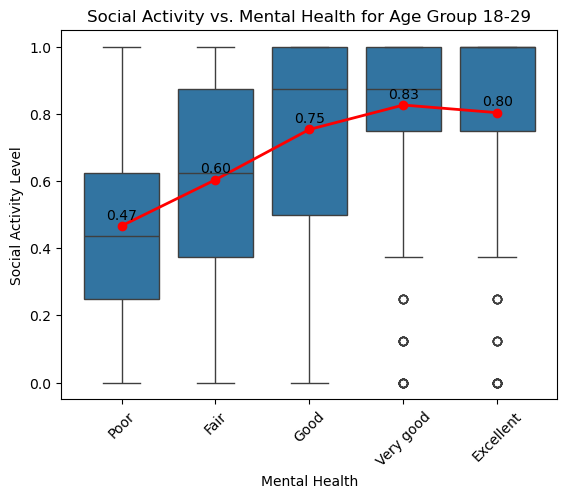

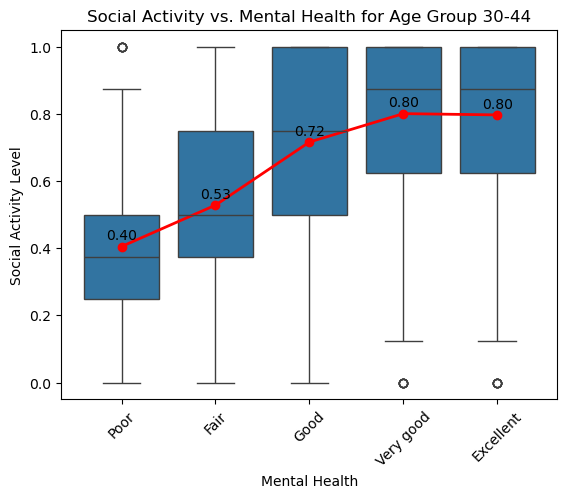

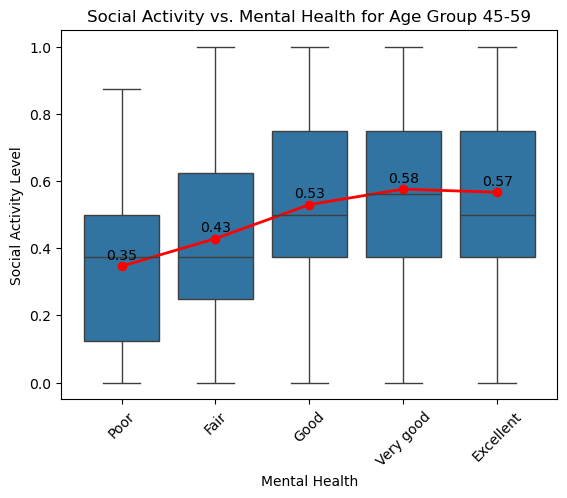

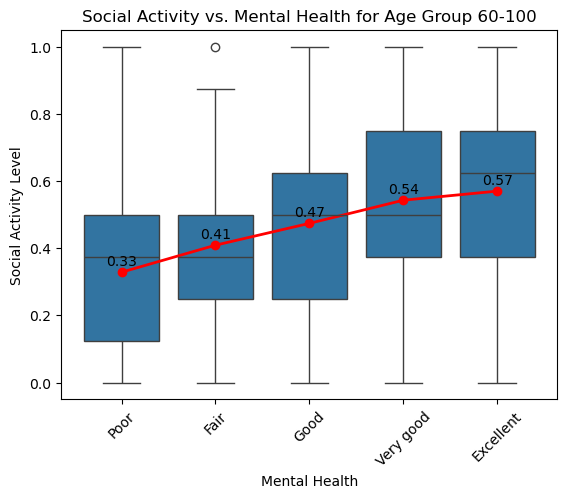

In [7]:
cleaned_df5 = cleaned_df4.copy()
print(cleaned_df5['DEMO_age_group'])

social_activities = [E,F,G,H,I,J,K,L]
for activity in social_activities:
    cleaned_df5.loc[:, activity] = cleaned_df5[activity].map({"Yes": 1, "No": 0})

cleaned_df5['average_activity'] = cleaned_df5[social_activities].mean(axis=1)


age_groups = ['18-29', '30-44', '45-59', '60-100']
for age in age_groups:
    filtered_df = cleaned_df5[cleaned_df5['DEMO_age_group'] == age]

    # Box plot
    sns.boxplot(
     
        x='WELLNESS_self_rated_mental_health', 
        y='average_activity', 
        order =categories,
        data=filtered_df,)
    
    # Calculate the average social activity for each mental health category
    category_means = filtered_df.groupby('WELLNESS_self_rated_mental_health')['average_activity'].mean().reindex(categories)

    # Add a line showing the relative increase in social activity
    plt.plot(category_means.index, category_means.values, marker='o', color='red', label='Relative Increase', linestyle='-', linewidth=2)

    # Annotate the points on the line to show the exact values
    for i, mean in enumerate(category_means.values):
        plt.annotate(f'{mean:.2f}', 
                     (category_means.index[i], mean), 
                     textcoords="offset points", 
                     xytext=(0, 5), ha='center', fontsize=10, color='black')

    plt.title(f'Social Activity vs. Mental Health for Age Group {age}')
    plt.xlabel('Mental Health')
    plt.ylabel('Social Activity Level')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()


In [8]:
# List of activities to analyze
activities = [
    'CONNECTION_activities_greeted_neighbour_or_stranger_pm',
    'CONNECTION_activities_group_exercise_pm',
    'CONNECTION_activities_helped_pm',
    'CONNECTION_activities_hug_pm',
    'CONNECTION_activities_kissed_pm',
    'CONNECTION_activities_visited_family_pm',
    'CONNECTION_activities_visited_friends_pm',
    'CONNECTION_activities_new_friend_pm'
]

# Well-being column to correlate with
well_being_metric = 'WELLNESS_life_satisfaction'

# Encode categorical columns (like 'Yes', 'No' or strings) to numeric
# Example: Convert 'Yes'/'No' to 1/0 for 'COVID_vaccinated' and similar columns
for column in activities + [well_being_metric]:
    if cleaned_df4[column].dtype == 'object':  # Check if the column has categorical data
        cleaned_df4.loc[:, column] = cleaned_df4[column].map({'Yes': 1, 'No': 0}).fillna(0)

# Calculate correlations for each age group
results = []
for age_group, group_data in cleaned_df4.groupby('DEMO_age_group'):  # Use 'DEMO_age_group' instead of 'Age Group'
    # Calculate correlations for activities with the well-being metric
    correlations = group_data[activities + [well_being_metric]].corr()[well_being_metric][activities]
    
    # Find the activity with the highest correlation
    most_impactful_activity = correlations.idxmax()
    highest_correlation = correlations.max()
    
    # Append results
    results.append({
        'Age Group': age_group,
        'Most Impactful Activity': most_impactful_activity,
        'Correlation': highest_correlation
    })

# Create a summary DataFrame
impact_summary = pd.DataFrame(results)
print(impact_summary)


  Age Group                            Most Impactful Activity  Correlation
0      0-17  CONNECTION_activities_greeted_neighbour_or_str...     0.409499
1     18-29            CONNECTION_activities_group_exercise_pm     0.117095
2     30-44            CONNECTION_activities_group_exercise_pm     0.258456
3     45-59                    CONNECTION_activities_kissed_pm     0.278413
4    60-100           CONNECTION_activities_visited_friends_pm     0.245891


/tmp/ipykernel_164/3506324095.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for age_group, group_data in cleaned_df4.groupby('DEMO_age_group'):  # Use 'DEMO_age_group' instead of 'Age Group'
